In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
red = np.random.normal(loc = 5, size = (2, 100))
blue = np.random.normal(loc = 7, scale = 0.8,  size = (2, 100))

<Axes: >

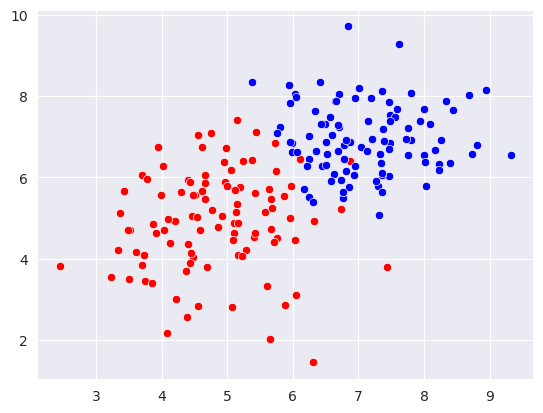

In [4]:
sns.set_style('darkgrid')
sns.scatterplot(x = red[0, :], y = red[1, :], c = 'red')
sns.scatterplot(x = blue[0, :], y = blue[1, :], c = 'blue')


In [5]:
red_df = pd.DataFrame(red.T, columns = ['x1', 'x2'])
red_df['type'] = 1

In [6]:
blue_df = pd.DataFrame(blue.T, columns = ['x1', 'x2'])
blue_df['type'] = 0

In [7]:
df = pd.concat([red_df, blue_df])

<Axes: xlabel='x1', ylabel='x2'>

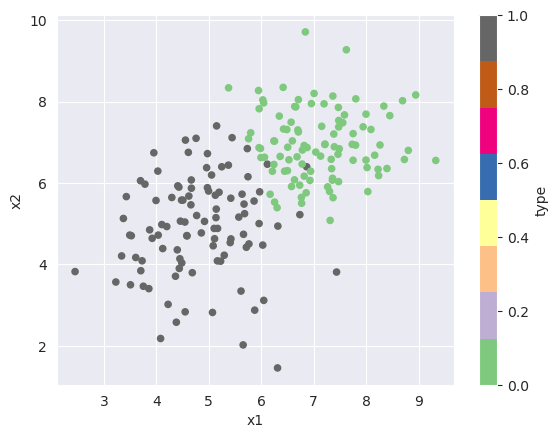

In [8]:
df.plot(kind = 'scatter', x = 'x1', y = 'x2', c = 'type', colormap='Accent')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df[['x1', 'x2']].values, df.type.values, test_size=0.2, random_state = 47)

In [10]:
poly = PolynomialFeatures(degree=7)
X = poly.fit_transform(x_train)

In [11]:
ln = LogisticRegression(n_jobs=-1, random_state=17)

In [12]:
ln.fit(X, y_train)

/home/pathetic/anaconda3/envs/based/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=17)

In [13]:
ln.score(poly.fit_transform(x_test), y_test)

1.0

In [14]:
xx, yy = np.meshgrid(np.arange(df.x1.min()-0.1, df.x1.max()+0.1, 0.01), np.arange(df.x2.min()-0.1, df.x2.max()+0.1, 0.01))

In [15]:
Z = ln.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(yy.shape)

<Axes: >

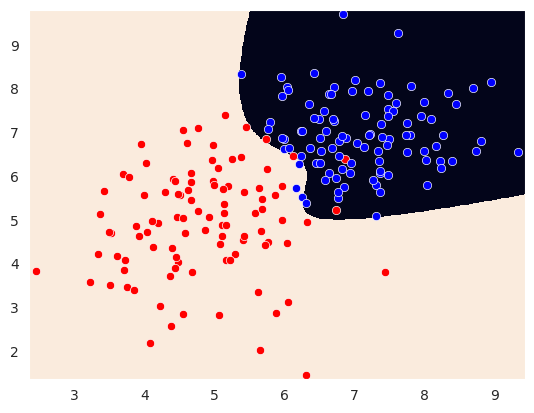

In [16]:
plt.pcolormesh(xx, yy, Z)
#plt.contour(xx, yy, Z)
sns.scatterplot(x = red[0, :], y = red[1, :], c = 'red')
sns.scatterplot(x = blue[0, :], y = blue[1, :], c = 'blue')

